In [16]:
import tensorflow as tf 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG19 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data ()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
x_train = x_train.astype ("float32") / 255.0
x_test = x_test.astype ("float32") / 255.0

In [4]:
base_model = VGG19 (include_top = False, input_shape = (32, 32, 3))

80134624/80134624 [==============================] - 5s 0us/step


In [5]:
for layer in base_model.layers:
  layer.trainable = False

In [6]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense (512, activation = 'relu'))
model.add(Dropout (0.5))
model.add(Dense (10, activation= 'softmax'))

In [7]:
model.compile (optimizer = Adam (learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics='accuracy'
              )

In [8]:
learning_rate_reduction = ReduceLROnPlateau (monitor = 'val_accuracy')

In [9]:
model.fit (x_train, y_train, batch_size = 64, epochs = 50, validation_data = (x_test, y_test), callbacks = [learning_rate_reduction])

Epoch 1/50
782/782 [==============================] - 24s 18ms/step - loss: 1.5087 - accuracy: 0.4682 - val_loss: 1.3209 - val_accuracy: 0.5302 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - 13s 17ms/step - loss: 1.3258 - accuracy: 0.5313 - val_loss: 1.2507 - val_accuracy: 0.5597 - lr: 0.0010
Epoch 3/50
782/782 [==============================] - 13s 17ms/step - loss: 1.2711 - accuracy: 0.5508 - val_loss: 1.2137 - val_accuracy: 0.5758 - lr: 0.0010
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 1.2357 - accuracy: 0.5636 - val_loss: 1.1959 - val_accuracy: 0.5793 - lr: 0.0010
Epoch 5/50
782/782 [==============================] - 13s 17ms/step - loss: 1.2095 - accuracy: 0.5759 - val_loss: 1.1816 - val_accuracy: 0.5850 - lr: 0.0010
Epoch 6/50
782/782 [==============================] - 13s 16ms/step - loss: 1.1835 - accuracy: 0.5839 - val_loss: 1.1714 - val_accuracy: 0.5864 - lr: 0.0010
Epoch 7/50
782/782 [==============================] - 14s 

In [20]:
metrics = pd.DataFrame (model.history.history)

<Axes: >

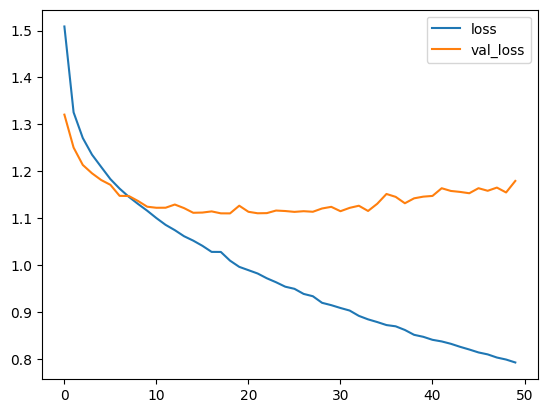

In [11]:
metrics[['loss','val_loss']].plot()

<Axes: >

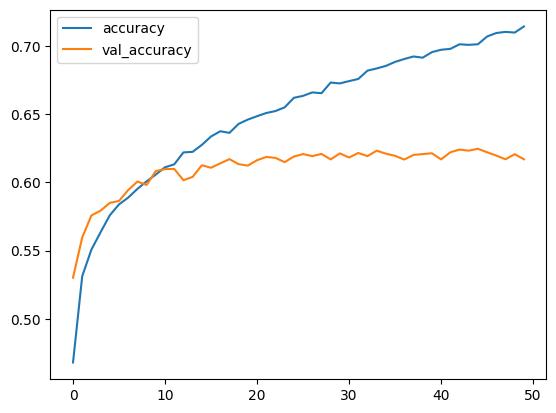

In [12]:
metrics[['accuracy','val_accuracy']].plot()

In [14]:
x_test_predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 3s 8ms/step


In [17]:
print(confusion_matrix(y_test,x_test_predictions))

[[714  21  47  27  24  15  10  12  80  50]
 [ 33 679  14  34  13  18  17   9  45 138]
 [ 55  17 538  86  84  74  84  24  24  14]
 [ 22  46  74 466  59 170  70  23  18  52]
 [ 27  14  74  93 558  55  75  75  15  14]
 [ 15  25  54 182  55 555  41  41   7  25]
 [ 10  24  49  67  72  55 689   7  14  13]
 [ 21  13  58  51  92 102  14 596  12  41]
 [ 99  67  23  27  20   5   5   6 702  46]
 [ 35 120  15  45   9  20  17  26  41 672]]


In [18]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1000
           1       0.66      0.68      0.67      1000
           2       0.57      0.54      0.55      1000
           3       0.43      0.47      0.45      1000
           4       0.57      0.56      0.56      1000
           5       0.52      0.56      0.54      1000
           6       0.67      0.69      0.68      1000
           7       0.73      0.60      0.66      1000
           8       0.73      0.70      0.72      1000
           9       0.63      0.67      0.65      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000

